In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import math
from numpy.linalg import inv
%matplotlib inline

import os
import imageio
import time
from IPython.display import Image


In [106]:
# Definições
massa = 1.0
k = 1
alpha = 1
beta = 1.0


dt = 0.15
tempo = 4000


N = 30
step = 1

# Generate Signal
signal_freq = 0.5
signal_amplitude = 1


salvar_img = True
intervalo_imagem = 25

salvar_img_fft = False
intervalo_imagem_fft = 200




pi = math.pi

31
31
5.66553889764798e-16


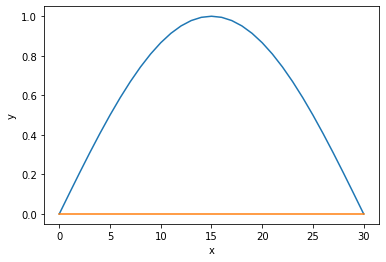

In [107]:
#posX = [i for i in range(N+1)]

#Parabola
#posY = [N2**2-i**2 for i in range(-N2,N2+1)]
#posY = [math.sin(i*pi/N) for i in range(0,N+1)]


posX = np.arange(0, N+step, step)


#Sine wave Signal
posY = signal_amplitude * np.sin(2.0*np.pi*signal_freq*posX/N)


num_particulas = len(posY)


print(len(posX))
print(len(posY))
print(posY[-1])

plt.ylabel("y")
plt.xlabel("x")
plt.plot(posX, posY)
plt.plot(posX, [0 for i in range(len(posX))] )

In [108]:
veloY = [0 for i in range(num_particulas)]
# print("Velocidade Inicial: {}".format(veloY))
print("Velocidade Inicial Size: {}".format(len(veloY)))

Velocidade Inicial Size: 31


# Simulação

In [109]:
def aceleracao(posY):
  size = len(posY)

  aceY = [0 for i in range(size)]
  for i in range(1,size-1):
    aceY[i] = (k/massa) * (posY[i+1] + posY[i-1] - 2*posY[i]) * ( 1.0 + alpha*(posY[i+1]-posY[i-1]) )
  
  return aceY


In [110]:
def velocidade(posY, veloY):
  size = len(posY)

  aceY = aceleracao(posY)

  new_veloY = [0.0 for i in range(size)]
  for i in range(size):
    new_veloY[i] = veloY[i] + 0.5*aceY[i]*dt

  return new_veloY

In [111]:
def velocidade_final(veloY, aceY):
  size = len(veloY)

  new_veloY = [0.0 for i in range(size)]
  for i in range(size):
    new_veloY[i] = veloY[i] + 0.5*aceY[i]*dt
  
  return new_veloY

In [112]:
def posicao(posY, new_veloY, dt):
  size = len(posY)

  new_posY = [0.0 for i in range(size)]
  for i in range(size):
    new_posY[i] = posY[i] + new_veloY[i]*dt
  
  return new_posY

In [113]:
def plota_figura(posX, posY, t):
  figname = 'f.jpeg'
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.figure(figsize=(5,3))
  plt.ylim(-1.01, 1.01)
  plt.title('FPU - Tempo {:.1f}'.format(t))
  
  x = []
  y = []
  tamanho_step_pra_mostrar_N = int(num_particulas/N)
  for i in range(0, len(posX), tamanho_step_pra_mostrar_N):
    x.append(posX[i])
    y.append(posY[i])

  plt.scatter(x, y, s=2, color='black')
  #plt.grid()
  plt.savefig(figname)            
  plt.close()
  images.append(imageio.imread(figname))
  os.remove(figname)

In [114]:
def plota_fft(x, y, tempo):
  figname = 'fft.jpeg'
  plt.xlabel('X')
  plt.ylabel('Nada')
  plt.ylim(0,1.01)
  plt.title('FFT {:.2f}'.format(tempo))

#  x = [i for i in range(len(y))]

  plt.scatter(x, y, c='black', s=5)
  plt.grid()
  plt.savefig(figname)            
  plt.close()
  images_fft.append(imageio.imread(figname))
  os.remove(figname)

In [115]:
from scipy.fft import fft, fftfreq

def fazerFFT(posY, step, fft_vet):
  yf = fft(posY)
  yf = np.abs(yf)[0:int(len(yf)/2.0)]
  soma = np.sum(yf)
  
  for i in range(len(fft_vet)):
    fft_vet[i].append(yf[i] / soma)
  
  return fft_vet, yf/soma

In [116]:
from scipy import fftpack

def fazerFFT2(posY, N, fft_vet):
  qnt_pontos = len(posY)

  sig_noise_fft = fftpack.fft(posY)
  sig_noise_amp = 2.0 / qnt_pontos * np.abs(sig_noise_fft)
  sig_noise_freq = np.abs(fftpack.fftfreq(qnt_pontos, N/(qnt_pontos)))

  soma = np.sum(sig_noise_amp)
  for i in range(len(fft_vet)):
    fft_vet[i].append(sig_noise_amp[i]/soma)


  return sig_noise_freq, sig_noise_amp, fft_vet

# Codigo principal

In [117]:
t = 0
contador_fig = 0
contador_fig_fft = 0

images = []
images_fft = []

sig_noise_freq = []
sig_noise_amp = []

fft_vet = [[1], [0], [0], [0], [0], [0]]

yf = []

while(t < tempo):
  
  # PLOTA A CORDA
  if(contador_fig == intervalo_imagem and salvar_img):
    plota_figura(posX, posY, t)
    contador_fig = 0
  
  # PLOTA O FFT
  if(contador_fig_fft == intervalo_imagem_fft and salvar_img_fft):
    # fft_vet, yf = fazerFFT(posY, step, fft_vet)
    # plota_fft(sig_noise_freq, sig_noise_amp, t)
    sig_noise_freq, sig_noise_amp, fft_vet = fazerFFT2(posY, N, fft_vet)
    contador_fig_fft = 0


  # calcula v(t + 0.5dt) = v(t) + 0.5*a(t)*dt
  new_veloY = velocidade(posY, veloY)

  # calcula x(t+dt) = x(t) + v(t+0.5dt)*dt
  posY = posicao(posY, new_veloY, dt)

  # Calcula a(t+dt)
  new_aceY = aceleracao(posY)

  # Calcula v(t+dt)
  veloY = velocidade_final(new_veloY, new_aceY)

  t = t + dt
  contador_fig = contador_fig + 1
  contador_fig_fft = contador_fig_fft + 1


plt.close()

if salvar_img:
  imageio.mimsave('corda.gif', images, fps=10, subrectangles=True, palettesize=32)
  print("salvou corda")
if salvar_img_fft:
  #imageio.mimsave('fft.gif', images_fft, fps=10)
  print("oi")

salvou corda


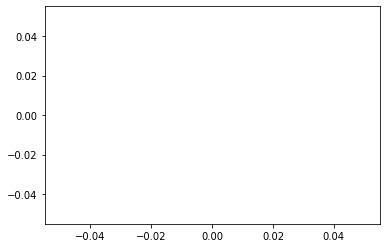

In [118]:
plt.plot(fft_vet[1])

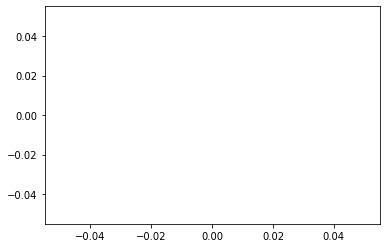

In [119]:
plt.plot(fft_vet[2])

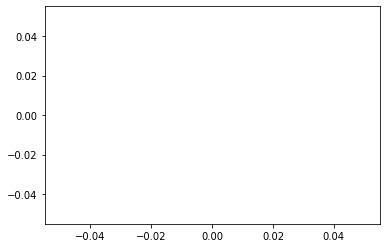

In [120]:
plt.plot(fft_vet[3])

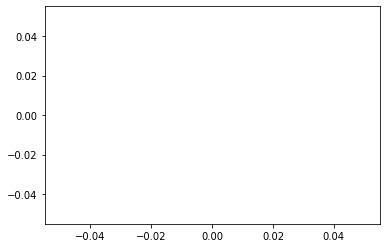

In [121]:
plt.plot(fft_vet[4])

In [122]:
def intermedia(vet, qnt_pt):
  new_vet = [[] for i in range(len(vet))]
  for i in range(0, len(vet[0])-17, qnt_pt):
    for k in range(len(vet)): # pra cada modo
      soma = 0.0
      for j in range(0, qnt_pt):
        soma = soma + fft_vet[k][i+j]
      new_vet[k].append(soma/qnt_pt)
  return new_vet




In [123]:
# new_fft = intermedia(fft_vet, 10)

# max = np.max(new_fft[1])

# for i in range(len(new_fft)):
#   for j in range(len(new_fft[0])):
#     new_fft[i][j] = new_fft[i][j]/max 

In [124]:

# plt.figure(figsize=(15,7))

# #new_fft = intermedia(new_fft, 2)
# plt.plot(new_fft[1][1:200], label='Modo 1')
# plt.plot(new_fft[2][1:200], label='Modo 2')
# plt.plot(new_fft[3][1:200], label='Modo 3')
# plt.plot(new_fft[4][1:200], label='Modo 4')
# plt.plot(new_fft[5][1:200], label='Modo 5')
# plt.title("Modos de vibração")
# plt.xlabel("Tempo")
# plt.ylabel("Porcentagem")
# plt.legend()

In [125]:
# for k in range(len(vet)): # pra cada modo
#   for i in range(0, len(vet[0]), qnt_pt):
  
#     soma = 0.0
#     for j in range(0, qnt_pt):
#       soma = soma + fft_vet[k][i+j]
#     new_vet[k].append(soma/qnt_pt)
